In [1]:
import pandas as pd
import missingno as msno

In [10]:
Concatenate = pd.read_csv("PATH\\Train\\FMP_Fundamentals.csv", ";")
Concatenate.set_index("Unnamed: 0", inplace=True)
Concatenate.index.name = None

In [11]:
# useless
Concatenate = Concatenate[Concatenate["fillingDate"].notna()]
# not needed
Concatenate.drop(columns=["fillingDate.1","fillingDate.2","acceptedDate","acceptedDate.1",\
                           "acceptedDate.2","period","period.1","period.2","link.1","link.2","link","finalLink.1","finalLink",\
                          "finalLink.2"], inplace = True)
Concatenate.drop(columns=['idYear',"idMonth"], inplace = True)

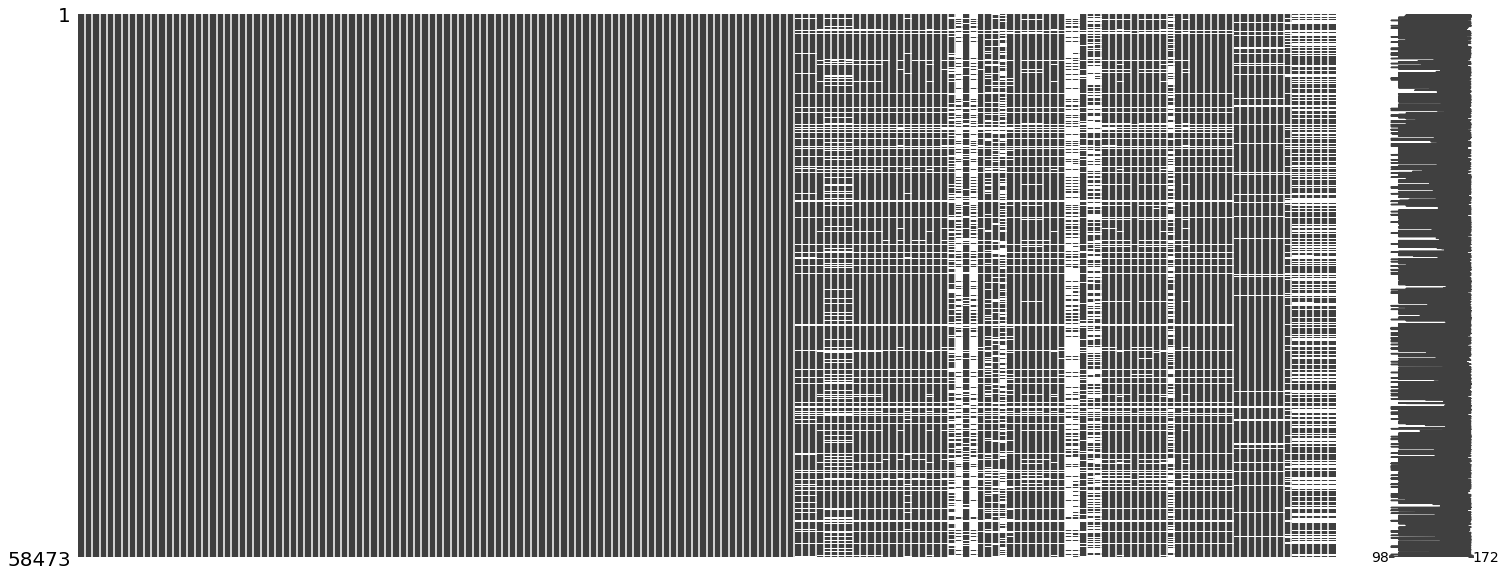

In [12]:
#initial
msno.matrix(Concatenate)

In [13]:
#drop cols with lots of #NV
# keep more than 10%: ratios might be useful, seperate training
Concatenate.dropna(axis=1, thresh=len(Concatenate)*0.6, inplace=True)
Concatenate.reset_index(drop=True, inplace = True)

In [14]:
# drop rows with lots of missing values
Concatenate.dropna(axis=0, thresh=len(Concatenate.columns)*0.5, inplace=True)
Concatenate.reset_index(drop=True, inplace = True)

In [15]:
Concatenate

,index,Ticker,fillingDate,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,...,T5YIFRM,UNRATE,GDPC1,adjclose,Classifier 3Y02,Classifier 3Y09,Classifier 3Y15,Classifier 3Y05,Classifier 3Y07,Classifier 3Y04
0,2019,AAPL,31.10.2019 00:00,4.884400e+10,5.171300e+10,1.010000e+11,4.580400e+10,4.106000e+09,1.235200e+10,1.630000e+11,...,1.79,3.6,19010.848,72.909500,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,AAPL,05.11.2018 00:00,2.591300e+10,4.038800e+10,6.630100e+10,4.899500e+10,3.956000e+09,1.208700e+10,1.310000e+11,...,2.00,3.8,18950.347,40.713184,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,AAPL,03.11.2017 00:00,2.028900e+10,5.389200e+10,7.418100e+10,3.567300e+10,4.855000e+09,1.393600e+10,1.290000e+11,...,2.23,4.1,18530.483,40.349579,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,AAPL,26.10.2016 00:00,2.048400e+10,4.667100e+10,6.715500e+10,2.929900e+10,2.132000e+09,8.283000e+09,1.070000e+11,...,2.13,4.7,17977.299,27.470144,1.0,1.0,1.0,1.0,1.0,1.0
4,2015,AAPL,28.10.2015 00:00,2.112000e+10,2.048100e+10,4.160100e+10,3.034300e+10,2.349000e+09,1.508500e+10,8.937800e+10,...,1.65,4.9,17613.264,24.422157,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58468,2004,A,21.12.2004 00:00,2.315000e+09,0.000000e+00,2.315000e+09,1.044000e+09,1.026000e+09,1.920000e+08,4.577000e+09,...,2.54,5.2,14771.602,14.867786,1.0,1.0,0.0,1.0,1.0,1.0
58469,2003,A,22.12.2003 00:00,1.607000e+09,0.000000e+00,1.607000e+09,1.086000e+09,9.950000e+08,2.010000e+08,3.889000e+09,...,2.45,5.8,14221.147,21.180405,0.0,0.0,0.0,0.0,0.0,0.0
58470,2002,A,20.12.2002 00:00,1.844000e+09,0.000000e+00,1.844000e+09,1.119000e+09,1.184000e+09,7.330000e+08,4.880000e+09,...,2.05,5.9,13634.253,8.177285,1.0,1.0,1.0,1.0,1.0,1.0
58471,2001,A,22.01.2002 00:00,1.170000e+09,0.000000e+00,1.170000e+09,1.214000e+09,1.491000e+09,9.240000e+08,4.799000e+09,...,NaN,NaN,NaN,21.657413,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# drop cols with lots of 0
# not sure if values are actually 0 or just missing data
count0=0

for header in Concatenate.columns.values:
    if not ((header =="Classifier 3Y09") or (header=="Classifier 3Y15")\
            or (header=="Classifier 3Y05")or (header=="Classifier 3Y07")\
           or (header=="Classifier 3Y04")):
        x=len(Concatenate[header][Concatenate[header]==0])
        if x/len(Concatenate) > 0.3:
            count0+=1
            print (header+":"+ str(round(x/len(Concatenate), 2)))
            Concatenate.drop(columns=[header], inplace = True)


print (count0)

shortTermInvestments:0.68
inventory:0.44
goodwill:0.48
intangibleAssets:0.36
longTermInvestments:0.61
taxAssets:0.58
shortTermDebt:0.68
taxPayables:0.66
deferredRevenue:0.44
deferredRevenueNonCurrent:0.9
deferredTaxLiabilitiesNonCurrent:0.62
totalInvestments:0.37
deferredIncomeTax:0.31
inventory.1:0.5
investmentsInPropertyPlantAndEquipment:0.34
acquisitionsNet:0.75
purchasesOfInvestments:0.55
salesMaturitiesOfInvestments:0.8
otherInvestingActivites:0.54
debtRepayment:0.39
commonStockIssued:0.72
dividendsPaid:0.48
otherFinancingActivites:0.51
effectOfForexChangesOnCash:0.62
researchAndDevelopmentExpenses:0.66
sellingAndMarketingExpenses:0.79
otherExpenses:0.33
totalOtherIncomeExpensesNet:0.39
payoutRatio:0.44
29


In [17]:
Concatenate

,index,Ticker,fillingDate,cashAndCashEquivalents,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwillAndIntangibleAssets,...,T5YIFRM,UNRATE,GDPC1,adjclose,Classifier 3Y02,Classifier 3Y09,Classifier 3Y15,Classifier 3Y05,Classifier 3Y07,Classifier 3Y04
0,2019,AAPL,31.10.2019 00:00,4.884400e+10,1.010000e+11,4.580400e+10,1.235200e+10,1.630000e+11,3.737800e+10,0.000000e+00,...,1.79,3.6,19010.848,72.909500,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,AAPL,05.11.2018 00:00,2.591300e+10,6.630100e+10,4.899500e+10,1.208700e+10,1.310000e+11,4.130400e+10,0.000000e+00,...,2.00,3.8,18950.347,40.713184,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,AAPL,03.11.2017 00:00,2.028900e+10,7.418100e+10,3.567300e+10,1.393600e+10,1.290000e+11,3.378300e+10,8.015000e+09,...,2.23,4.1,18530.483,40.349579,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,AAPL,26.10.2016 00:00,2.048400e+10,6.715500e+10,2.929900e+10,8.283000e+09,1.070000e+11,2.701000e+10,8.620000e+09,...,2.13,4.7,17977.299,27.470144,1.0,1.0,1.0,1.0,1.0,1.0
4,2015,AAPL,28.10.2015 00:00,2.112000e+10,4.160100e+10,3.034300e+10,1.508500e+10,8.937800e+10,2.247100e+10,9.009000e+09,...,1.65,4.9,17613.264,24.422157,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58468,2004,A,21.12.2004 00:00,2.315000e+09,2.315000e+09,1.044000e+09,1.920000e+08,4.577000e+09,1.258000e+09,4.430000e+08,...,2.54,5.2,14771.602,14.867786,1.0,1.0,0.0,1.0,1.0,1.0
58469,2003,A,22.12.2003 00:00,1.607000e+09,1.607000e+09,1.086000e+09,2.010000e+08,3.889000e+09,1.447000e+09,4.020000e+08,...,2.45,5.8,14221.147,21.180405,0.0,0.0,0.0,0.0,0.0,0.0
58470,2002,A,20.12.2002 00:00,1.844000e+09,1.844000e+09,1.119000e+09,7.330000e+08,4.880000e+09,1.579000e+09,6.850000e+08,...,2.05,5.9,13634.253,8.177285,1.0,1.0,1.0,1.0,1.0,1.0
58471,2001,A,22.01.2002 00:00,1.170000e+09,1.170000e+09,1.214000e+09,9.240000e+08,4.799000e+09,1.848000e+09,1.070000e+09,...,NaN,NaN,NaN,21.657413,0.0,0.0,0.0,0.0,0.0,0.0


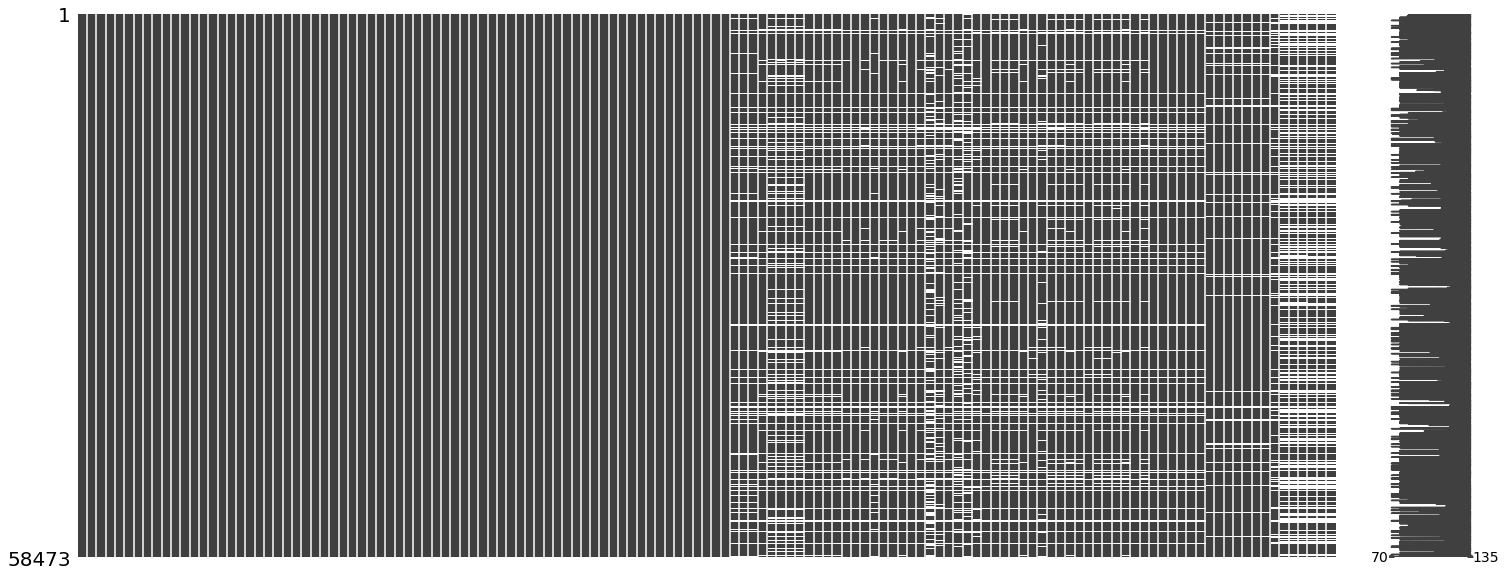

In [18]:
msno.matrix(Concatenate)

In [19]:
Concatenate_short=Concatenate
# drop rows with lots of missing values
Concatenate_short.dropna(axis=0, thresh=len(Concatenate_short.columns)*0.9, inplace=True)
Concatenate_short.reset_index(drop=True, inplace = True)
Concatenate_short.dropna(axis=1, thresh=len(Concatenate_short.columns)*0.9, inplace=True)
Concatenate_short.reset_index(drop=True, inplace = True)

In [20]:
Concatenate_short.fillna(Concatenate_short.median(), inplace=True)

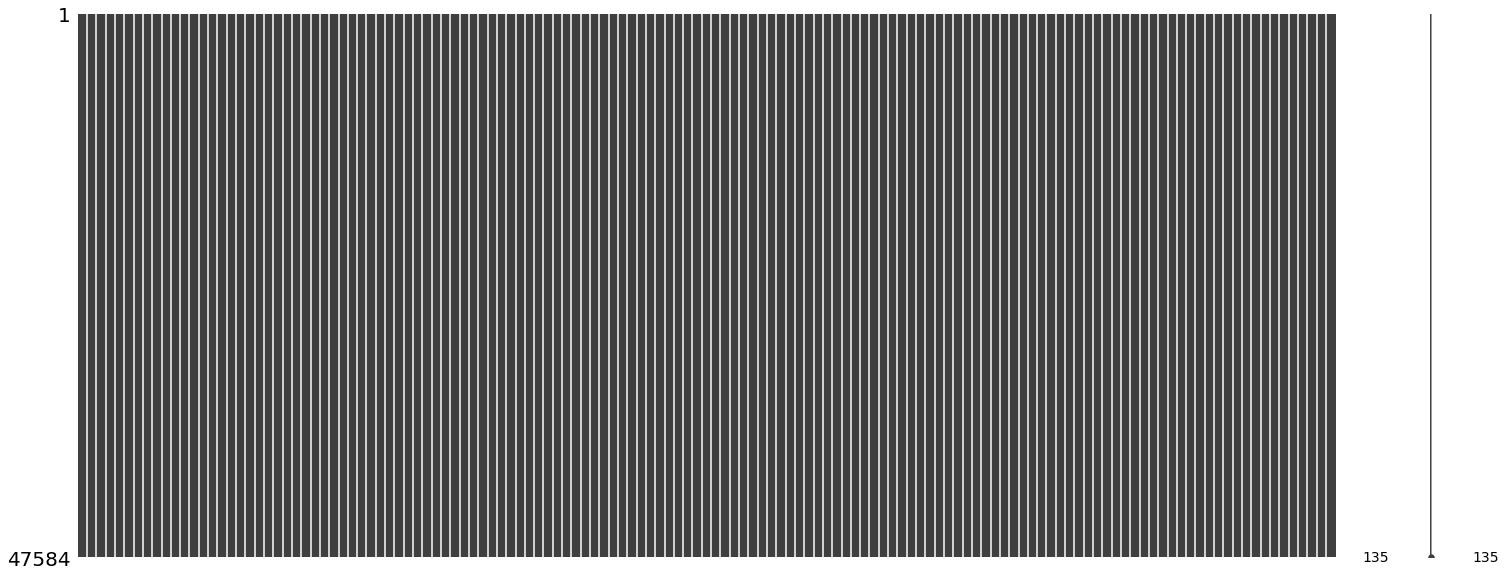

In [21]:
msno.matrix(Concatenate_short)

In [22]:
Concatenate

,index,Ticker,fillingDate,cashAndCashEquivalents,cashAndShortTermInvestments,netReceivables,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwillAndIntangibleAssets,...,T5YIFRM,UNRATE,GDPC1,adjclose,Classifier 3Y02,Classifier 3Y09,Classifier 3Y15,Classifier 3Y05,Classifier 3Y07,Classifier 3Y04
0,2019,AAPL,31.10.2019 00:00,4.884400e+10,1.010000e+11,4.580400e+10,1.235200e+10,1.630000e+11,3.737800e+10,0.000000e+00,...,1.79,3.6,19010.848,72.909500,1.0,0.0,0.0,1.0,0.0,1.0
1,2018,AAPL,05.11.2018 00:00,2.591300e+10,6.630100e+10,4.899500e+10,1.208700e+10,1.310000e+11,4.130400e+10,0.000000e+00,...,2.00,3.8,18950.347,40.713184,1.0,0.0,0.0,1.0,0.0,1.0
2,2017,AAPL,03.11.2017 00:00,2.028900e+10,7.418100e+10,3.567300e+10,1.393600e+10,1.290000e+11,3.378300e+10,8.015000e+09,...,2.23,4.1,18530.483,40.349579,1.0,0.0,0.0,1.0,0.0,1.0
3,2016,AAPL,26.10.2016 00:00,2.048400e+10,6.715500e+10,2.929900e+10,8.283000e+09,1.070000e+11,2.701000e+10,8.620000e+09,...,2.13,4.7,17977.299,27.470144,1.0,1.0,1.0,1.0,1.0,1.0
4,2015,AAPL,28.10.2015 00:00,2.112000e+10,4.160100e+10,3.034300e+10,1.508500e+10,8.937800e+10,2.247100e+10,9.009000e+09,...,1.65,4.9,17613.264,24.422157,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47579,2006,A,22.12.2006,2.262000e+09,2.262000e+09,6.920000e+08,3.770000e+08,3.958000e+09,7.750000e+08,4.680000e+08,...,2.32,4.4,15493.328,20.875027,0.0,0.0,0.0,0.0,0.0,0.0
47580,2005,A,17.01.2006,2.226000e+09,2.226000e+09,7.530000e+08,7.460000e+08,4.447000e+09,8.730000e+08,3.620000e+08,...,2.52,4.7,15302.705,23.261898,0.0,0.0,0.0,0.0,0.0,0.0
47581,2004,A,21.12.2004 00:00,2.315000e+09,2.315000e+09,1.044000e+09,1.920000e+08,4.577000e+09,1.258000e+09,4.430000e+08,...,2.54,5.2,14771.602,14.867786,1.0,1.0,0.0,1.0,1.0,1.0
47582,2003,A,22.12.2003 00:00,1.607000e+09,1.607000e+09,1.086000e+09,2.010000e+08,3.889000e+09,1.447000e+09,4.020000e+08,...,2.45,5.8,14221.147,21.180405,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
Concatenate_short.to_csv("PATH\\Train\\FMP_preprocessed_Short.csv")